In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

## Exploratory Data Analysis

This is an EDA in a Kaggle dataset, containing information from One Piece anime episodes.
You can find the dataset here: https://www.kaggle.com/datasets/aditya2803/one-piece-anime.

### File content
The dataset has 8 attributes:
 * **rank:** is based on the average number of votes per episode adjusted with the average rating
 * **trend:** represents the amount of new votes submitted during the past 7 days.
 * **season:** which season the episode belongs
 * **name:** the name of the episode
 * **start:** the year that aired
 * **total votes:** total of votes received
 * **average_rating:** average rating of the episode

In [81]:
# Read the data into a Pandas DataFrame
df = pd.read_csv('ONE PIECE.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,rank,trend,season,episode,name,start,total_votes,average_rating
0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5
...,...,...,...,...,...,...,...,...
953,"41,448",26,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
954,"35,342",44,1,955,&quot;A New Alliance?! Kaido's Army Gathers&quot;,2020,407,7.4
955,"33,715",75,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2
956,"2,940",964,1,957,Big News! The Warlords Attack Incident,2021,"2,862",9.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            958 non-null    object 
 1   trend           958 non-null    object 
 2   season          958 non-null    int64  
 3   episode         958 non-null    int64  
 4   name            958 non-null    object 
 5   start           958 non-null    int64  
 6   total_votes     958 non-null    object 
 7   average_rating  958 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 60.0+ KB


## Cleaning and adjusting the data
There are a few things that have to be adjusted so the dataset can be used on an analysis. Such as:
* Some of the episodes names came with "& quot;" before and after, denoting quotes that weren't removed correctly.
* The attributes 'total_votes', 'rank', and 'trend' should be presented as *integer* or *float* instead of *object*.
* Some of those objects that should be integer, presents empty values represented with '-' when they should be **NaN** or **Null**
* Also, numbers greater than '999' have a comma indicating that the value is in the magnitude of thousands
* Some calculus will be performed to determine if there's a presence of outliers

In [82]:
# Adjusting the episodes names
df['name'] = df['name'].str.replace('&quot;','')
df

,rank,trend,season,episode,name,start,total_votes,average_rating
0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5
...,...,...,...,...,...,...,...,...
953,"41,448",26,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
954,"35,342",44,1,955,A New Alliance?! Kaido's Army Gathers,2020,407,7.4
955,"33,715",75,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2
956,"2,940",964,1,957,Big News! The Warlords Attack Incident,2021,"2,862",9.1


In [83]:
# Adjusting the empty values of the object columns
num_col = ['rank', 'trend',  'total_votes']
for col in num_col:
    df[col]= df[col].replace('-', np.NaN)
df

,rank,trend,season,episode,name,start,total_votes,average_rating
0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,"28,818",8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,"37,113",4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5
...,...,...,...,...,...,...,...,...
953,"41,448",26,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
954,"35,342",44,1,955,A New Alliance?! Kaido's Army Gathers,2020,407,7.4
955,"33,715",75,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2
956,"2,940",964,1,957,Big News! The Warlords Attack Incident,2021,"2,862",9.1


In [84]:
# Adjusting the values with commas
num_col = ['rank', 'trend',  'total_votes']
for col in num_col:
    df[col]= df[col].str.replace(',', '')
df

,rank,trend,season,episode,name,start,total_votes,average_rating
0,24129,18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,29290,11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,32043,7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,28818,8,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,37113,4,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5
...,...,...,...,...,...,...,...,...
953,41448,26,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
954,35342,44,1,955,A New Alliance?! Kaido's Army Gathers,2020,407,7.4
955,33715,75,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2
956,2940,964,1,957,Big News! The Warlords Attack Incident,2021,2862,9.1


In [85]:
# Adjusting the type of the object columns
df['rank'] = df['rank'].astype(int)
df['trend'] = df['trend'].astype(float)
df['total_votes'] = df['total_votes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            958 non-null    int64  
 1   trend           584 non-null    float64
 2   season          958 non-null    int64  
 3   episode         958 non-null    int64  
 4   name            958 non-null    object 
 5   start           958 non-null    int64  
 6   total_votes     958 non-null    int64  
 7   average_rating  958 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 60.0+ KB


In [86]:
# For the sake of the analysis, we're going to fill the NaN values with the mean of the respective column
num_col = ['rank', 'trend',  'total_votes']
for col in num_col:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df

,rank,trend,season,episode,name,start,total_votes,average_rating
0,24129,18.000000,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,29290,11.000000,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,32043,7.000000,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7
3,28818,8.000000,1,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449,8.1
4,37113,4.000000,1,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370,7.5
...,...,...,...,...,...,...,...,...
953,41448,26.000000,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
954,35342,44.000000,1,955,A New Alliance?! Kaido's Army Gathers,2020,407,7.4
955,33715,75.000000,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2
956,2940,964.000000,1,957,Big News! The Warlords Attack Incident,2021,2862,9.1


<AxesSubplot:>

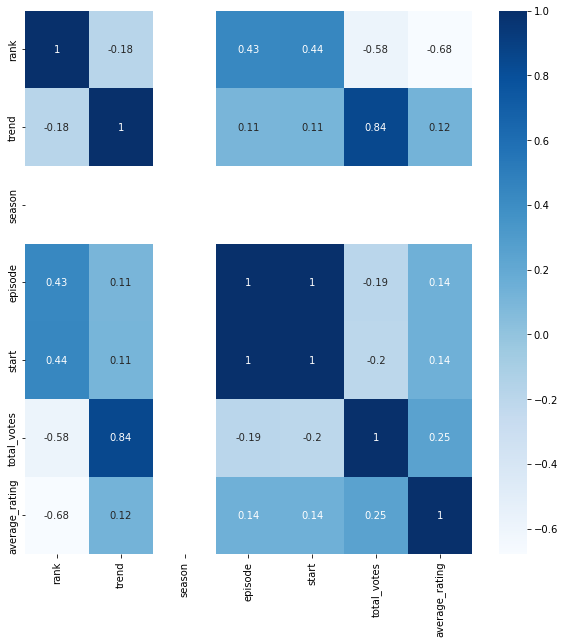

In [91]:
import seaborn as sns
# Finding the correlations between our attributes and check the ones that are not explained by the data itself
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

### The major correlations are:
* **Positives:** (episode, start), (trend,total_votes), (start,rank), (episode,rank)
* **Negatives:** (rank,average_rating), (rank,total_votes)
    
Let's see how these attributes interact with each other.

- Episode and start are highly correlated because the higher the value of episode, the higher the value of start. Which makes sense, given that the episode numbering is sequential and they are released weekly.
- Trend is the amount of new votes submitted during the past seven days, which explain a little why they are correlated.
- Rank is the resulting of combining the average_rating with the total votes, which explain their correlation.

Let's check the other correlations.


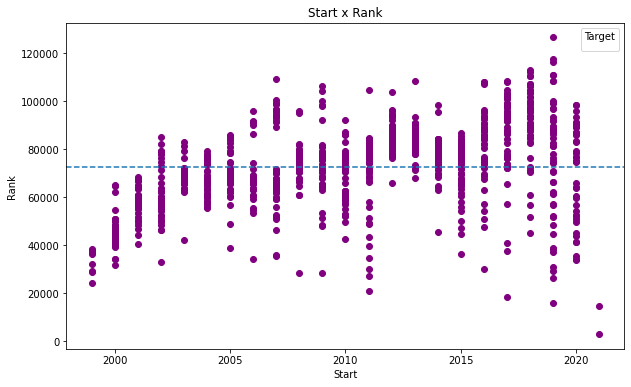

In [99]:
# start and rank
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=df["start"],
                     y=df["rank"],
                     c = 'purple');

# Customize the plot
ax.set(title="Start x Rank",
       xlabel = "Start",
       ylabel = "Rank");

# Add a horizontal line
ax.axhline(df["rank"].mean(),
           linestyle='--');



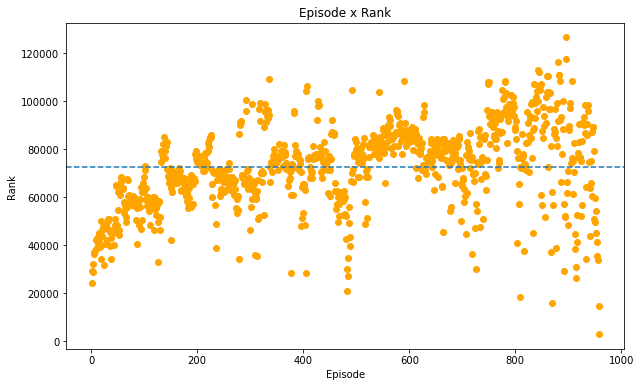

In [102]:
# episode and rank
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=df["episode"],
                     y=df["rank"],
                     c = 'orange');

# Customize the plot
ax.set(title="Episode x Rank",
       xlabel = "Episode",
       ylabel = "Rank");

# Add a horizontal line
ax.axhline(df["rank"].mean(),
           linestyle='--');


It looks like we have some outliers in both correlations. Let's analyze and try to find these records.

### Outliers
As we are analyzing the correlations between 'start' and 'rank' and 'episode' and 'rank', and both 'episode' and 'start' are sequential numbers with zero outliers, let's analyze 'rank' for the presence of outliers.

For this, we will use Seaborn's 'boxplot' method, which shows us the lower and upper limits of the outliers.

<AxesSubplot:>

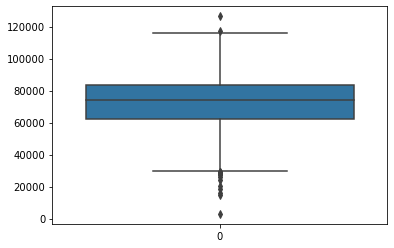

In [103]:
sns.boxplot(df['rank'])

According to the obtained boxplot, the outliers lay under 20000 and above 120000.
Let's see who are those guys on our dataset.

In [126]:
# Set a new DataFrame to store the outliers
outliers = pd.DataFrame()

# Iterate over the dataset to obtain the outliers using the condition found with the boxplot
for row in df.itertuples(index=False):
    if row.rank < 20000 or row.rank > 120000:
        outliers = pd.concat([outliers, pd.DataFrame([row],columns = row._fields)], ignore_index=True)

In [127]:
# These are the outliers from our dataset
outliers

,rank,trend,season,episode,name,start,total_votes,average_rating
0,18272,58.000000,1,808,Kanashiki Kettou: Luffy tai Sanji (Kouhen),2017,571,9.6
1,15729,80.000000,1,870,A Fist of Divine Speed! Another Gear Four Appl...,2019,683,9.5
2,126450,1.000000,1,896,Side Story! Clash! Luffy vs. the King of Carbo...,2019,91,6.0
3,2940,964.000000,1,957,Big News! The Warlords Attack Incident,2021,2862,9.1
4,14751,5.626712,1,958,The Legendary Battle! Garp and Roger,2021,746,9.4


You can discard these outliers or keep them, it depends on the type of analysis you are doing.

In [129]:
# Let's save our treated dataset in a csv file
# I will keep the outliers in the original dataset, but I will also save them in a different file

df.to_csv('One_Pice_Treated.csv', index = False)

outliers.to_csv('One_Piece_Outliers.csv', index = False)

## Conclusion
Through our analysis, we were able to clean and adjust the data to perform a futher investigation: find records that are considered outliers in comparison with the rest of our dataset. This information is important if we have the desire to perfom other analysis. The presence of outliers could impact the results and affect the trustability of our data.

Although this is a small dataset, it was a good training for performing EDA, undestanding the steps and applying the concepts.

A future analysis could be try and build a regression model to predict the 'rank' on other records of the dataset, knowing that the analysis could be tricky with the outliers.